# Exploring the data
Breakdown of samples, sexes, superpopulations, whats missing etc

In [2]:
import pandas as pd

# Load your feature counts dataframes for CHM13
batch1_chm13 = pd.read_csv('/home/alextu/scratch/results/summary_stats/chm13/verkko_batch1_chm13_collapsed_summary_metrics.csv')
batch2_chm13 = pd.read_csv('/home/alextu/scratch/results/summary_stats/chm13/verkko_batch2_chm13_collapsed_summary_metrics.csv')
batch3_chm13 = pd.read_csv('/home/alextu/scratch/results/summary_stats/chm13/verkko_batch3_chm13_collapsed_summary_metrics.csv')
batch4_chm13 = pd.read_csv('/home/alextu/scratch/results/summary_stats/chm13/verkko_batch123_chm13_collapsed_quadron_summary_metrics_combined.csv')

# Combine the CHM13 dataframes
df_chm13 = pd.concat([batch1_chm13, batch2_chm13, batch3_chm13, batch4_chm13], ignore_index=True)

# Extract sample identifier and haplotype from 'Sample_Haplotype' column for CHM13
df_chm13[['Sample', 'Haplotype']] = df_chm13['Sample_Haplotype'].str.split('_', expand=True)

# Remove duplicate haplotypes for CHM13
unique_haplotypes_df_chm13 = df_chm13.drop_duplicates(subset=['Sample_Haplotype'])

# Load metadata
metadata_df = pd.read_csv('/home/alextu/scratch/igsr_sample_metadata/igsr_samples.tsv', delimiter='\t')

# Merge metadata with the unique haplotypes DataFrame for CHM13
merged_df_chm13 = pd.merge(unique_haplotypes_df_chm13, metadata_df[['Sample name', 'Sex', 'Superpopulation name', 'Superpopulation code']], left_on='Sample', right_on='Sample name', how='left')

# Count the total number of unique haplotypes for CHM13
total_haplotypes_chm13 = len(merged_df_chm13['Sample_Haplotype'].unique())
print(f"Total number of unique haplotypes for CHM13: {total_haplotypes_chm13}")

# Check and count the sex and superpopulation annotations for CHM13
sex_counts_chm13 = merged_df_chm13['Sex'].value_counts()
print("Sex counts for CHM13:\n", sex_counts_chm13)

superpop_counts_chm13 = merged_df_chm13['Superpopulation name'].value_counts()
print("Superpopulation counts for CHM13:\n", superpop_counts_chm13)

# Identify samples with missing annotations for CHM13
missing_sex_chm13 = merged_df_chm13[merged_df_chm13['Sex'].isna()]['Sample']
missing_superpop_chm13 = merged_df_chm13[merged_df_chm13['Superpopulation name'].isna()]['Sample']

print("Samples with missing Sex annotation for CHM13:")
print(missing_sex_chm13)

print("\nSamples with missing Superpopulation annotation for CHM13:")
print(missing_superpop_chm13)

# Group by 'Superpopulation name' and 'Sex', then count occurrences for CHM13
haplotype_by_superpop_chm13 = merged_df_chm13.groupby(['Superpopulation name', 'Sex']).size().unstack(fill_value=0)

# Display the resulting DataFrame for CHM13
print("\nHaplotype by Superpopulation for CHM13:\n", haplotype_by_superpop_chm13)


# Load your feature counts dataframes for HG38
batch1_hg38 = pd.read_csv('/home/alextu/scratch/results/summary_stats/hg38/verkko_batch1_hg38_collapsed_summary_metrics.csv')
batch2_hg38 = pd.read_csv('/home/alextu/scratch/results/summary_stats/hg38/verkko_batch2_hg38_collapsed_summary_metrics.csv')
batch3_hg38 = pd.read_csv('/home/alextu/scratch/results/summary_stats/hg38/verkko_batch3_hg38_collapsed_summary_metrics.csv')
batch4_hg38 = pd.read_csv('/home/alextu/scratch/results/summary_stats/hg38/verkko_batch123_hg38_collapsed_quadron_summary_metrics_combined.csv')

# Combine the HG38 dataframes
df_hg38 = pd.concat([batch1_hg38, batch2_hg38, batch3_hg38, batch4_hg38], ignore_index=True)

# Extract sample identifier and haplotype from 'Sample_Haplotype' column for HG38
df_hg38[['Sample', 'Haplotype']] = df_hg38['Sample_Haplotype'].str.split('_', expand=True)

# Remove duplicate haplotypes for HG38
unique_haplotypes_df_hg38 = df_hg38.drop_duplicates(subset=['Sample_Haplotype'])

# Merge metadata with the unique haplotypes DataFrame for HG38
merged_df_hg38 = pd.merge(unique_haplotypes_df_hg38, metadata_df[['Sample name', 'Sex', 'Superpopulation name', 'Superpopulation code']], left_on='Sample', right_on='Sample name', how='left')

# Count the total number of unique haplotypes for HG38
total_haplotypes_hg38 = len(merged_df_hg38['Sample_Haplotype'].unique())
print(f"Total number of unique haplotypes for HG38: {total_haplotypes_hg38}")

# Check and count the sex and superpopulation annotations for HG38
sex_counts_hg38 = merged_df_hg38['Sex'].value_counts()
print("Sex counts for HG38:\n", sex_counts_hg38)

superpop_counts_hg38 = merged_df_hg38['Superpopulation name'].value_counts()
print("Superpopulation counts for HG38:\n", superpop_counts_hg38)

# Identify samples with missing annotations for HG38
missing_sex_hg38 = merged_df_hg38[merged_df_hg38['Sex'].isna()]['Sample']
missing_superpop_hg38 = merged_df_hg38[merged_df_hg38['Superpopulation name'].isna()]['Sample']

print("Samples with missing Sex annotation for HG38:")
print(missing_sex_hg38)

print("\nSamples with missing Superpopulation annotation for HG38:")
print(missing_superpop_hg38)

# Group by 'Superpopulation name' and 'Sex', then count occurrences for HG38
haplotype_by_superpop_hg38 = merged_df_hg38.groupby(['Superpopulation name', 'Sex']).size().unstack(fill_value=0)

# Display the resulting DataFrame for HG38
print("\nHaplotype by Superpopulation for HG38:\n", haplotype_by_superpop_hg38)


Total number of unique haplotypes for CHM13: 130
Sex counts for CHM13:
 Sex
female    68
male      58
Name: count, dtype: int64
Superpopulation counts for CHM13:
 Superpopulation name
African Ancestry        58
East Asian Ancestry     20
American Ancestry       18
South Asian Ancestry    16
European Ancestry       14
Name: count, dtype: int64
Samples with missing Sex annotation for CHM13:
11    NA21487
28    NA21487
81    NA24385
87    NA24385
Name: Sample, dtype: object

Samples with missing Superpopulation annotation for CHM13:
11    NA21487
28    NA21487
81    NA24385
87    NA24385
Name: Sample, dtype: object

Haplotype by Superpopulation for CHM13:
 Sex                   female  male
Superpopulation name              
African Ancestry          28    30
American Ancestry         12     6
East Asian Ancestry       12     8
European Ancestry          6     8
South Asian Ancestry      10     6
Total number of unique haplotypes for HG38: 130
Sex counts for HG38:
 Sex
female    68
male  

# Examining Chromosome Level Counts

Look at how total base coverage and total count is distributed across chromosomes. We need to pay attention to the sex chromosomes because what we see is that alignments to both sex chromosomes in a single haplotype is happening.

first box for hg38, second for chm13

In [6]:
import pandas as pd

# Load the dataframes
batch3_hg38 = pd.read_csv('/home/alextu/scratch/results/summary_stats/hg38/verkko_batch3_hg38_collapsed_summary_metrics.csv')
batch3_hg38_chr = pd.read_csv('/home/alextu/scratch/results/summary_stats/hg38/verkko_batch3_hg38_collapsed_summary_metrics_chr.csv')

# Define a function to extract and compare data for a given haplotype, focusing only on sex chromosomes
def extract_and_compare(haplotype):
    # Extract data for the given haplotype from batch3_hg38 dataframe
    hap_batch3_hg38 = batch3_hg38[batch3_hg38['Sample_Haplotype'] == haplotype]

    # Extract data for the given haplotype from batch3_hg38_chr dataframe
    hap_batch3_hg38_chr = batch3_hg38_chr[batch3_hg38_chr['Sample_Haplotype_Chromosome'].str.contains(haplotype)].copy()

    # Extract the Chromosome part from Sample_Haplotype_Chromosome
    hap_batch3_hg38_chr.loc[:, 'Chromosome'] = hap_batch3_hg38_chr['Sample_Haplotype_Chromosome'].str.extract(r'(chr[\dXY]+)')[0]

    # Ensure we are extracting only one haplotype for the chr dataframe and filter for sex chromosomes
    hap_batch3_hg38_chr = hap_batch3_hg38_chr[hap_batch3_hg38_chr['Sample_Haplotype_Chromosome'].str.contains(haplotype.split('_')[1]) & hap_batch3_hg38_chr['Chromosome'].isin(['chrX', 'chrY'])]

    # Group the chromosome data by Chromosome to get total counts and bases covered
    hap_batch3_hg38_chr_grouped = hap_batch3_hg38_chr.groupby('Chromosome').agg({
        'Total Count': 'sum',
        'Total Bases Covered': 'sum'
    }).reset_index()

    # Print the extracted data for comparison
    print(f"Data from batch3_hg38 for {haplotype}:")
    print(hap_batch3_hg38[['Sample_Haplotype', 'Total Count', 'Total Bases Covered']])

    print(f"\nSummed data from batch3_hg38_chr for {haplotype}:")
    print(hap_batch3_hg38_chr_grouped[['Chromosome', 'Total Count', 'Total Bases Covered']])

    # Compare Total Bases Covered and Total Count
    total_count_batch3_hg38 = hap_batch3_hg38['Total Count'].sum()
    total_bases_covered_batch3_hg38 = hap_batch3_hg38['Total Bases Covered'].sum()

    total_count_batch3_hg38_chr = hap_batch3_hg38_chr_grouped['Total Count'].sum()
    total_bases_covered_batch3_hg38_chr = hap_batch3_hg38_chr_grouped['Total Bases Covered'].sum()

    print(f"\nTotal Counts comparison for {haplotype}: {total_count_batch3_hg38} (batch3_hg38) vs {total_count_batch3_hg38_chr} (batch3_hg38_chr)")
    print(f"Total Bases Covered comparison for {haplotype}: {total_bases_covered_batch3_hg38} (batch3_hg38) vs {total_bases_covered_batch3_hg38_chr} (batch3_hg38_chr)")

# Extract and compare data for HG00096_hap1, HG00096_hap2, HG00732_hap1, and HG00732_hap2
extract_and_compare('HG00096_hap1')
extract_and_compare('HG00096_hap2')
extract_and_compare('HG00732_hap1')
extract_and_compare('HG00732_hap2')
extract_and_compare('HG00864_hap1')
extract_and_compare('HG00864_hap2')


Data from batch3_hg38 for HG00096_hap1:
    Sample_Haplotype  Total Count  Total Bases Covered
115     HG00096_hap1      5863251            135443713
116     HG00096_hap1       526425             12903944
117     HG00096_hap1       410920              6174103
118     HG00096_hap1      1377859             81793345
119     HG00096_hap1      1673630             69192714

Summed data from batch3_hg38_chr for HG00096_hap1:
  Chromosome  Total Count  Total Bases Covered
0       chrX         2440               180482
1       chrY       360726             18759617

Total Counts comparison for HG00096_hap1: 9852085 (batch3_hg38) vs 363166 (batch3_hg38_chr)
Total Bases Covered comparison for HG00096_hap1: 305507819 (batch3_hg38) vs 18940099 (batch3_hg38_chr)
Data from batch3_hg38 for HG00096_hap2:
   Sample_Haplotype  Total Count  Total Bases Covered
75     HG00096_hap2      1398390             80072345
76     HG00096_hap2      1316349             52430583
77     HG00096_hap2       481687       

In [7]:
import pandas as pd

# Load the dataframes
batch3_chm13 = pd.read_csv('/home/alextu/scratch/results/summary_stats/chm13/verkko_batch3_chm13_collapsed_summary_metrics.csv')
batch3_chm13_chr = pd.read_csv('/home/alextu/scratch/results/summary_stats/chm13/verkko_batch3_chm13_collapsed_summary_metrics_chr.csv')

# Define a function to extract and compare data for a given haplotype, focusing only on sex chromosomes
def extract_and_compare(haplotype):
    # Extract data for the given haplotype from batch3_chm13 dataframe
    hap_batch3_chm13 = batch3_chm13[batch3_chm13['Sample_Haplotype'] == haplotype]

    # Extract data for the given haplotype from batch3_chm13_chr dataframe
    hap_batch3_chm13_chr = batch3_chm13_chr[batch3_chm13_chr['Sample_Haplotype_Chromosome'].str.contains(haplotype)].copy()

    # Extract the Chromosome part from Sample_Haplotype_Chromosome
    hap_batch3_chm13_chr.loc[:, 'Chromosome'] = hap_batch3_chm13_chr['Sample_Haplotype_Chromosome'].str.extract(r'(chr[\dXY]+)')[0]

    # Ensure we are extracting only one haplotype for the chr dataframe and filter for sex chromosomes
    hap_batch3_chm13_chr = hap_batch3_chm13_chr[hap_batch3_chm13_chr['Sample_Haplotype_Chromosome'].str.contains(haplotype.split('_')[1]) & hap_batch3_chm13_chr['Chromosome'].isin(['chrX', 'chrY'])]

    # Group the chromosome data by Chromosome to get total counts and bases covered
    hap_batch3_chm13_chr_grouped = hap_batch3_chm13_chr.groupby('Chromosome').agg({
        'Total Count': 'sum',
        'Total Bases Covered': 'sum'
    }).reset_index()

    # Print the extracted data for comparison
    print(f"Data from batch3_chm13 for {haplotype}:")
    print(hap_batch3_chm13[['Sample_Haplotype', 'Total Count', 'Total Bases Covered']])

    print(f"\nSummed data from batch3_chm13_chr for {haplotype}:")
    print(hap_batch3_chm13_chr_grouped[['Chromosome', 'Total Count', 'Total Bases Covered']])

    # Compare Total Bases Covered and Total Count
    total_count_batch3_chm13 = hap_batch3_chm13['Total Count'].sum()
    total_bases_covered_batch3_chm13 = hap_batch3_chm13['Total Bases Covered'].sum()

    total_count_batch3_chm13_chr = hap_batch3_chm13_chr_grouped['Total Count'].sum()
    total_bases_covered_batch3_chm13_chr = hap_batch3_chm13_chr_grouped['Total Bases Covered'].sum()

    print(f"\nTotal Counts comparison for {haplotype}: {total_count_batch3_chm13} (batch3_chm13) vs {total_count_batch3_chm13_chr} (batch3_chm13_chr)")
    print(f"Total Bases Covered comparison for {haplotype}: {total_bases_covered_batch3_chm13} (batch3_chm13) vs {total_bases_covered_batch3_chm13_chr} (batch3_chm13_chr)")

# Extract and compare data for HG00096_hap1, HG00096_hap2, HG00732_hap1, HG00732_hap2, HG00864_hap1, and HG00864_hap2
extract_and_compare('HG00096_hap1')
extract_and_compare('HG00096_hap2')
extract_and_compare('HG00732_hap1')
extract_and_compare('HG00732_hap2')
extract_and_compare('HG00864_hap1')
extract_and_compare('HG00864_hap2')


Data from batch3_chm13 for HG00096_hap1:
   Sample_Haplotype  Total Count  Total Bases Covered
60     HG00096_hap1       410920              6174103
61     HG00096_hap1      5863251            135443713
62     HG00096_hap1       526425             12903944
63     HG00096_hap1      1377859             81793345
64     HG00096_hap1      1673630             69192714

Summed data from batch3_chm13_chr for HG00096_hap1:
  Chromosome  Total Count  Total Bases Covered
0       chrX         2440               180482
1       chrY       360726             18759617

Total Counts comparison for HG00096_hap1: 9852085 (batch3_chm13) vs 363166 (batch3_chm13_chr)
Total Bases Covered comparison for HG00096_hap1: 305507819 (batch3_chm13) vs 18940099 (batch3_chm13_chr)
Data from batch3_chm13 for HG00096_hap2:
    Sample_Haplotype  Total Count  Total Bases Covered
100     HG00096_hap2      6016912            134689746
101     HG00096_hap2       424072              6403378
102     HG00096_hap2      1401887  

# CHM13 vs HG38 Non-B Whole Genome Comparison

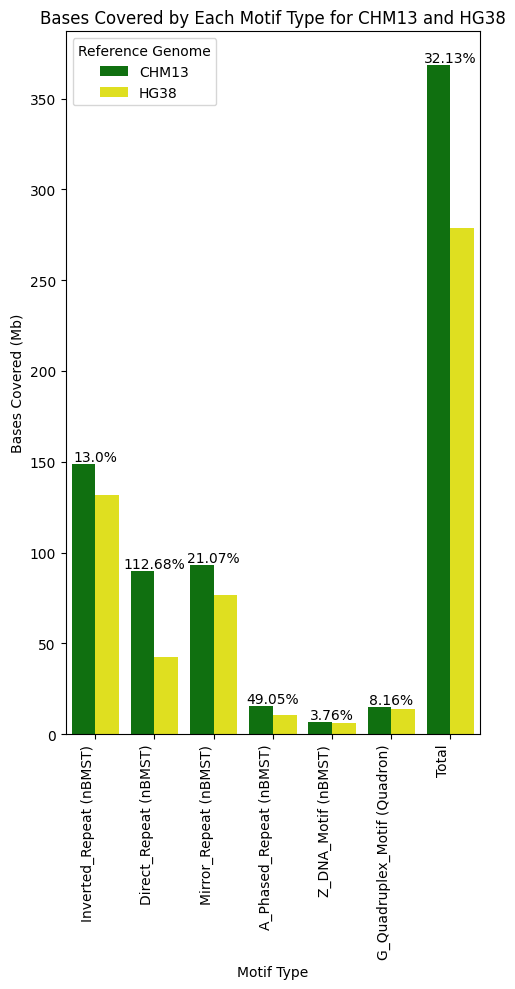

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file, ensuring numeric columns are read as strings initially
file_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/collapsed_annotation_info.csv'  # Change to the actual file path
df = pd.read_csv(file_path, dtype={'CHM13 Bases Covered': str, 'HG38 Bases Covered': str, '% Increase (bases)': str})

# Convert columns to numeric, removing commas
df['CHM13 Bases Covered'] = df['CHM13 Bases Covered'].str.replace(',', '').astype(int)
df['HG38 Bases Covered'] = df['HG38 Bases Covered'].str.replace(',', '').astype(int)

# Convert bases to megabases
df['CHM13 Bases Covered (Mb)'] = df['CHM13 Bases Covered'] / 1e6
df['HG38 Bases Covered (Mb)'] = df['HG38 Bases Covered'] / 1e6

# Reshape the DataFrame to long format for plotting
df_long = pd.melt(df, id_vars=['Motif Type'], value_vars=['CHM13 Bases Covered (Mb)', 'HG38 Bases Covered (Mb)'],
                  var_name='Reference Genome', value_name='Bases Covered (Mb)')

# Rename the 'Reference Genome' values for clarity
df_long['Reference Genome'] = df_long['Reference Genome'].replace({
    'CHM13 Bases Covered (Mb)': 'CHM13',
    'HG38 Bases Covered (Mb)': 'HG38'
})

# Plotting
plt.figure(figsize=(5, 10))
barplot = sns.barplot(data=df_long, x='Motif Type', y='Bases Covered (Mb)', hue='Reference Genome', palette=['green', 'yellow'])
plt.xticks(rotation=90, ha='right')
plt.title('Bases Covered by Each Motif Type for CHM13 and HG38')
plt.ylabel('Bases Covered (Mb)')
plt.xlabel('Motif Type')
plt.legend(title='Reference Genome')
plt.tight_layout()

# Annotate the bars with % increase
for i, row in df.iterrows():
    # Find the position of the CHM13 bar
    chm13_bar = df_long[(df_long['Motif Type'] == row['Motif Type']) & (df_long['Reference Genome'] == 'CHM13')]
    chm13_x = chm13_bar.index[0]
    chm13_y = row['CHM13 Bases Covered'] / 1e6  # Convert to megabases

    # Find the position of the HG38 bar
    hg38_bar = df_long[(df_long['Motif Type'] == row['Motif Type']) & (df_long['Reference Genome'] == 'HG38')]
    hg38_x = hg38_bar.index[0]
    hg38_y = row['HG38 Bases Covered'] / 1e6  # Convert to megabases

    # Annotate above the bars
    barplot.text(chm13_x, chm13_y, f"{row['% Increase (bases)']}", color='black', ha="center", va="bottom")
# Show plot
plt.show()


# Plotting Total Base Coverage Across ALL CHROMOSOMES

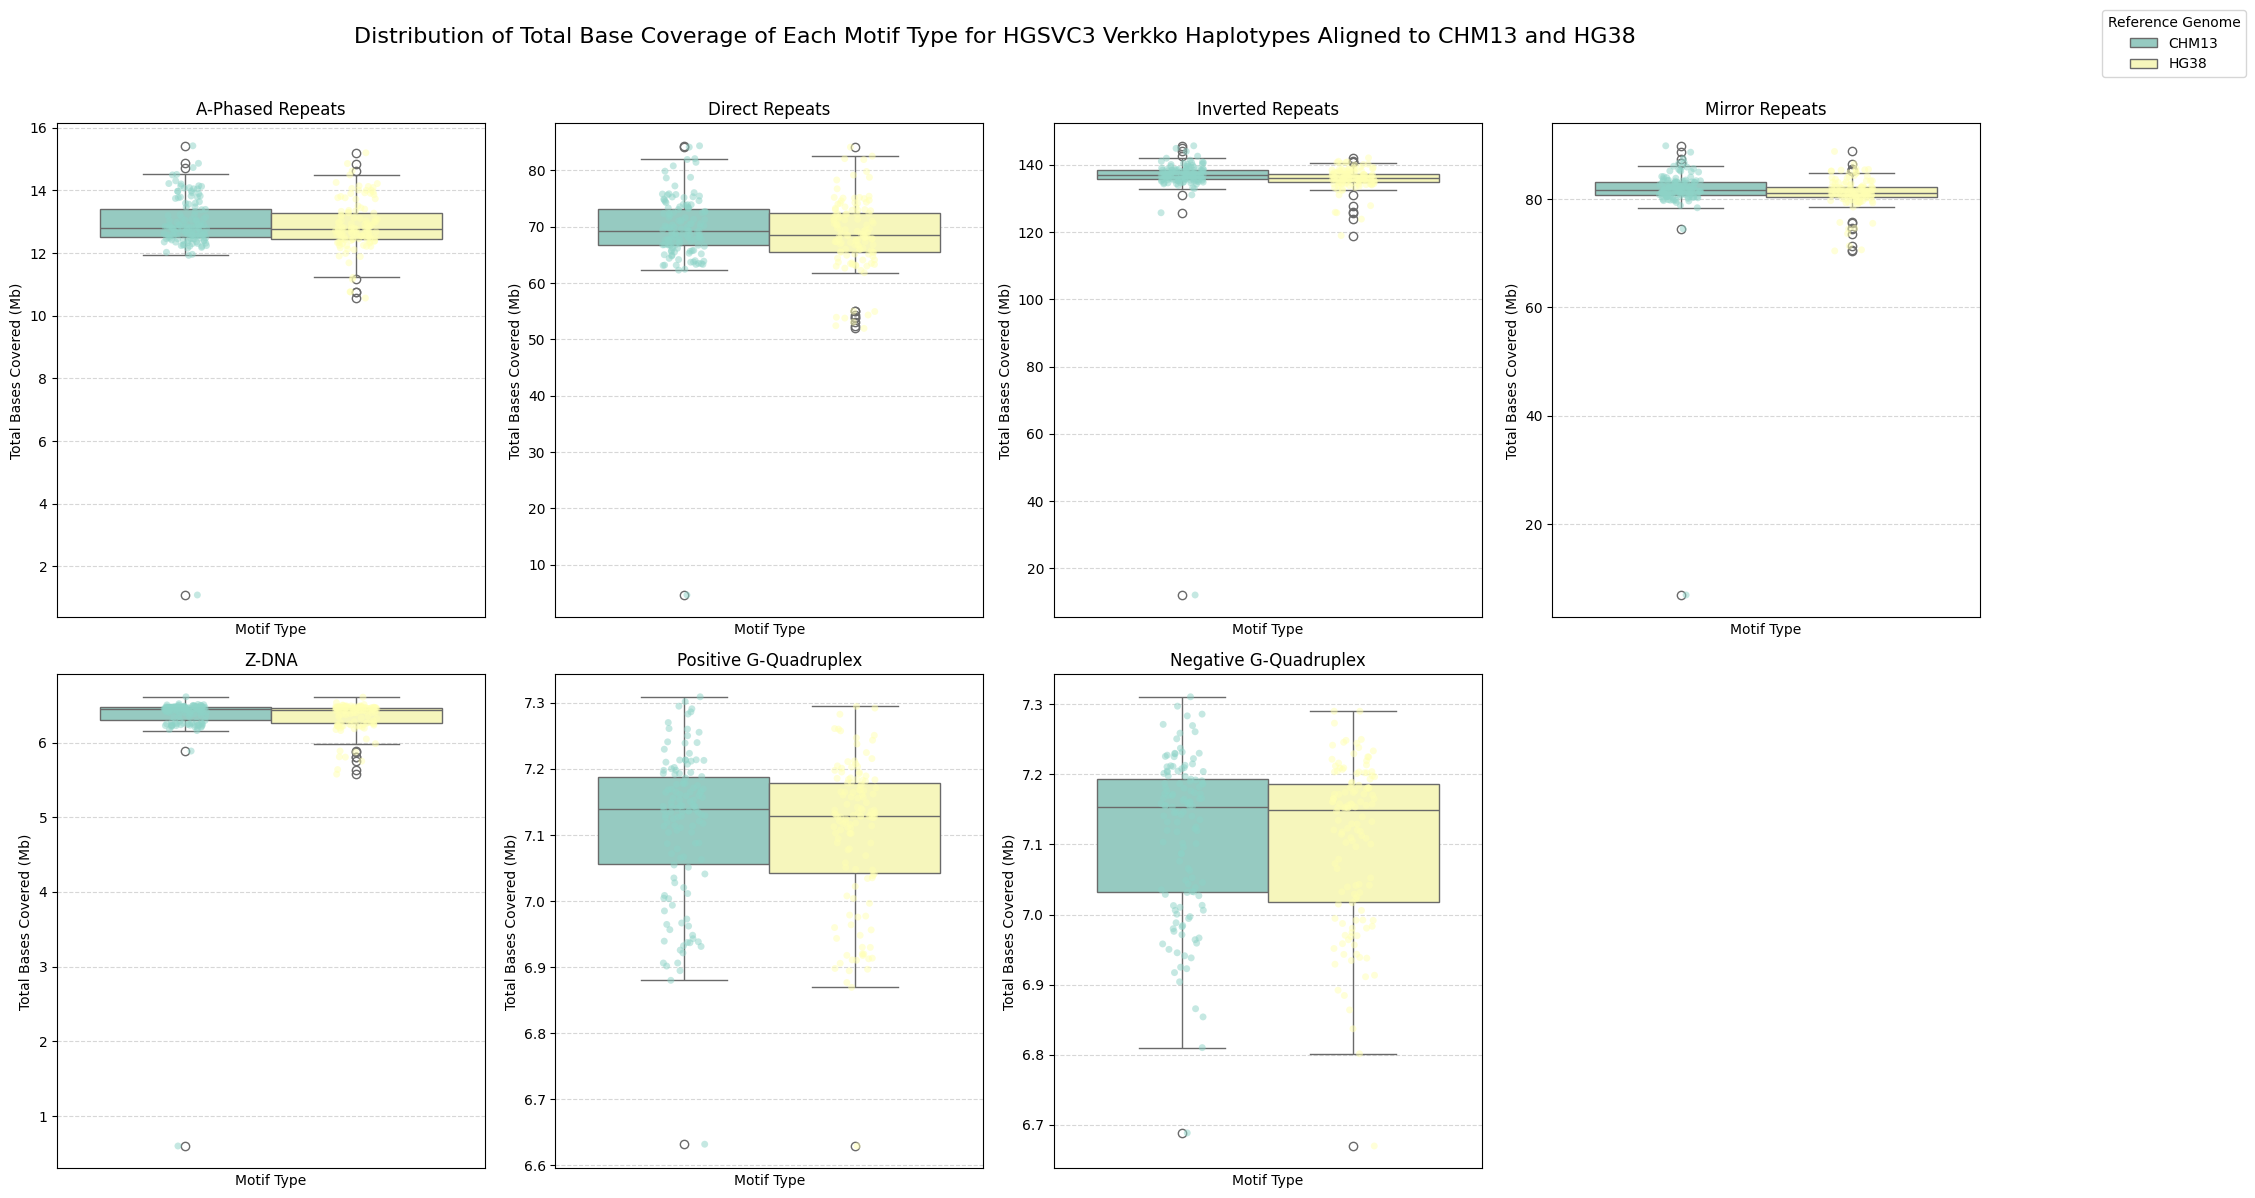

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FixedLocator

# Function to load and concatenate data from multiple batches
def load_data(batches, reference):
    dfs = []
    for batch in batches:
        file_path = f'/home/alextu/scratch/results/summary_stats/{reference}/verkko_batch{batch}_{reference}_collapsed_summary_metrics_chr.csv'
        df = pd.read_csv(file_path)
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

# Function to extract and prepare coverage data
def prepare_coverage_data(data):
    data = data.copy()
    data['Chromosome'] = data['Sample_Haplotype_Chromosome'].str.extract(r'(chr[\dXY]+)')[0]
    data['Haplotype'] = data['Sample_Haplotype_Chromosome'].str.extract(r'_(hap\d)_')[0]
    data['Sample_Haplotype'] = data['Sample_Haplotype_Chromosome'].str.extract(r'(.*_hap\d)')[0]
    return data

# Function to load G-quadruplex data
def load_quad_data(reference):
    quad_path = f'/home/alextu/scratch/results/summary_stats/{reference}/verkko_batch123_{reference}_collapsed_quadron_summary_metrics_combined_chr.csv'
    quad_df = pd.read_csv(quad_path)
    quad_df['Label'] = reference.upper()
    return quad_df

# Load the data for HG38 and CHM13 from specified batches
batches = [1, 2, 3]
hg38_data = load_data(batches, 'hg38')
chm13_data = load_data(batches, 'chm13')

# Load the G-quadruplex data for both HG38 and CHM13
hg38_quad_data = load_quad_data('hg38')
chm13_quad_data = load_quad_data('chm13')

# Prepare data
hg38_data = prepare_coverage_data(hg38_data)
chm13_data = prepare_coverage_data(chm13_data)

# Sum the total bases covered across all chromosomes for each haplotype and motif type
hg38_summed = hg38_data.groupby(['Sample_Haplotype', 'Motif Type']).agg({'Total Bases Covered': 'sum'}).reset_index()
chm13_summed = chm13_data.groupby(['Sample_Haplotype', 'Motif Type']).agg({'Total Bases Covered': 'sum'}).reset_index()

# Sum the total bases covered for G-quadruplex data across all chromosomes for each haplotype
hg38_quad_summed = hg38_quad_data.groupby(['Sample_Haplotype', 'Motif Type']).agg({'Total Bases Covered': 'sum'}).reset_index()
chm13_quad_summed = chm13_quad_data.groupby(['Sample_Haplotype', 'Motif Type']).agg({'Total Bases Covered': 'sum'}).reset_index()

# Using .loc to prevent SettingWithCopyWarning
hg38_quad_positive = hg38_quad_summed.loc[hg38_quad_summed['Motif Type'] == 'Positive_G_Quad'].copy()
chm13_quad_positive = chm13_quad_summed.loc[chm13_quad_summed['Motif Type'] == 'Positive_G_Quad'].copy()
hg38_quad_negative = hg38_quad_summed.loc[hg38_quad_summed['Motif Type'] == 'Negative_G_Quad'].copy()
chm13_quad_negative = chm13_quad_summed.loc[chm13_quad_summed['Motif Type'] == 'Negative_G_Quad'].copy()

# Combine the summed data
hg38_summed['Reference Genome'] = 'HG38'
chm13_summed['Reference Genome'] = 'CHM13'
hg38_quad_positive['Reference Genome'] = 'HG38'
chm13_quad_positive['Reference Genome'] = 'CHM13'
hg38_quad_negative['Reference Genome'] = 'HG38'
chm13_quad_negative['Reference Genome'] = 'CHM13'

combined_summed = pd.concat([hg38_summed, chm13_summed], ignore_index=True)
combined_quad_positive = pd.concat([hg38_quad_positive, chm13_quad_positive], ignore_index=True)
combined_quad_negative = pd.concat([hg38_quad_negative, chm13_quad_negative], ignore_index=True)

# Convert total bases covered to megabases for easier visualization
combined_summed['Total Bases Covered (Mb)'] = combined_summed['Total Bases Covered'] / 1e6
combined_quad_positive['Total Bases Covered (Mb)'] = combined_quad_positive['Total Bases Covered'] / 1e6
combined_quad_negative['Total Bases Covered (Mb)'] = combined_quad_negative['Total Bases Covered'] / 1e6

# Combine all data for plotting
all_data = pd.concat([combined_summed, combined_quad_positive, combined_quad_negative], ignore_index=True)

# Map short motif names to full names
motif_name_map = {
    'DR': 'Direct Repeats',
    'MR': 'Mirror Repeats',
    'IR': 'Inverted Repeats',
    'APR': 'A-Phased Repeats',
    'Z': 'Z-DNA',
    'Positive_G_Quad': 'Positive G-Quadruplex',
    'Negative_G_Quad': 'Negative G-Quadruplex'
}

# Unique motif types
motif_types = all_data['Motif Type'].unique()

# Plotting using seaborn
fig, axes = plt.subplots(2, 4, figsize=(20, 12), sharey=False)

# We will store handles and labels from the boxplots only
boxplot_handles = {}
boxplot_labels = []

# Adjust the axes layout for a 4x2 grid, with empty space for the 7th plot
for i, (ax, motif_type) in enumerate(zip(axes.flatten(), motif_types)):
    subset = all_data[all_data['Motif Type'] == motif_type]
    bplot = sns.boxplot(data=subset, x='Motif Type', y='Total Bases Covered (Mb)', hue='Reference Genome', palette='Set3', ax=ax, hue_order=['CHM13', 'HG38'])
    sns.stripplot(data=subset, x='Motif Type', y='Total Bases Covered (Mb)', hue='Reference Genome', palette='Set3', alpha=0.5, dodge=True, jitter=True, ax=ax, legend=False, hue_order=['CHM13', 'HG38'])
    ax.set_title(motif_name_map.get(motif_type, motif_type))
    ax.set_xlabel('Motif Type')
    ax.set_xticks([])
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    # Collect only handles and labels from boxplots to avoid duplicates
    if not boxplot_labels:  # if empty, initialize with first plot's labels
        handles, labels = bplot.get_legend_handles_labels()
        boxplot_handles = dict(zip(labels, handles))
        boxplot_labels = labels

    # Remove the automatically created legends
    ax.get_legend().remove()

axes[0, 0].set_ylabel('Total Bases Covered (Mb)')
axes[1, 0].set_ylabel('Total Bases Covered (Mb)')

# Remove the last subplot if there are fewer than 8 motif types
for j in range(len(motif_types), 8):
    fig.delaxes(axes.flatten()[j])

# Create a unified legend using the handles and labels from the boxplot only
fig.legend([boxplot_handles[label] for label in boxplot_labels], boxplot_labels, title='Reference Genome', bbox_to_anchor=(1.05, 1), loc='upper left')

fig.suptitle('Distribution of Total Base Coverage of Each Motif Type for HGSVC3 Verkko Haplotypes Aligned to CHM13 and HG38', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Plotting Chromosome Level Annotations

Plot the sum of total bases covered by nonB motifs for all haplotypes and group by chromosomes

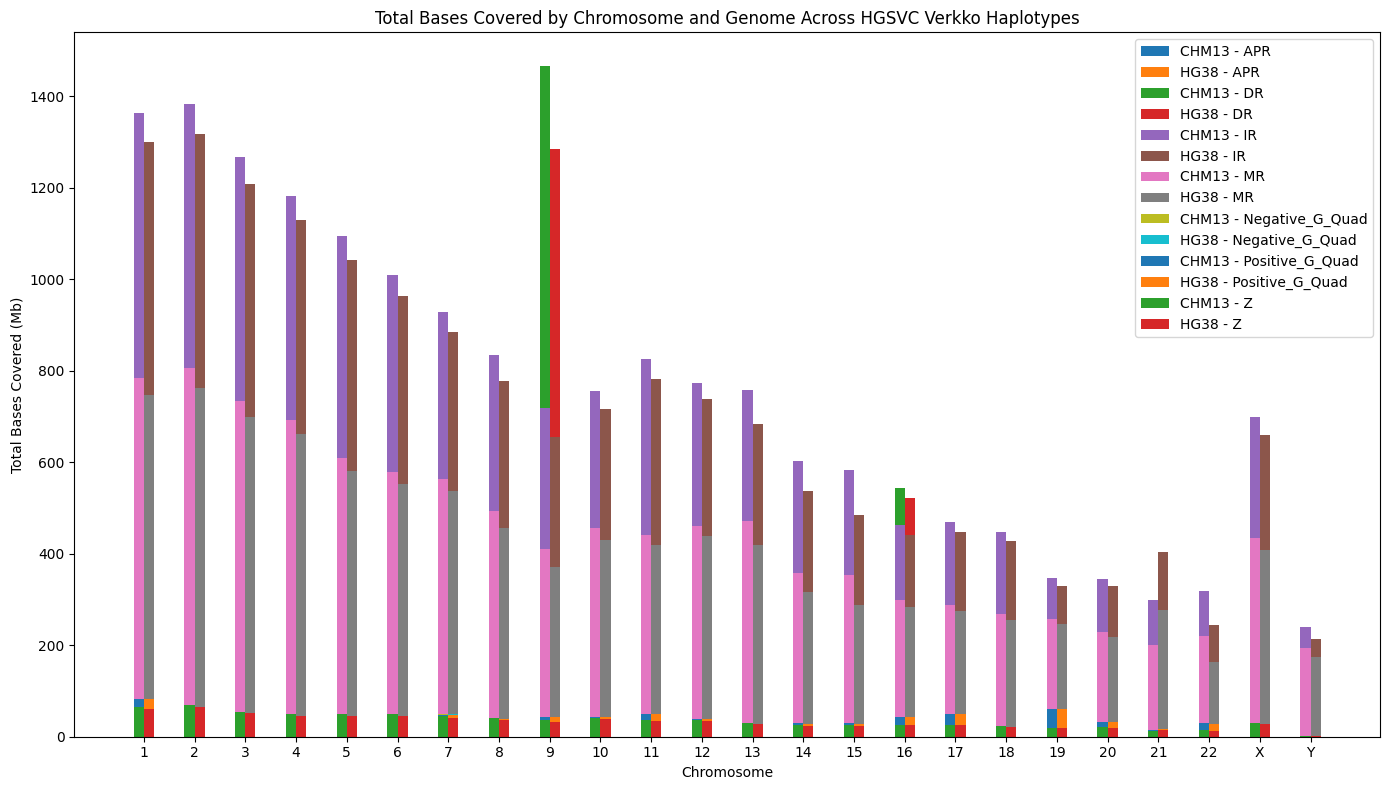

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to load and concatenate data from multiple batches
def load_data(batches, reference):
    dfs = []
    for batch in batches:
        file_path = f'/home/alextu/scratch/results/summary_stats/{reference}/verkko_batch{batch}_{reference}_collapsed_summary_metrics_chr.csv'
        df = pd.read_csv(file_path)
        df['Batch'] = f'Batch{batch}'
        dfs.append(df)
    # Load G quadruplex data
    quad_path = f'/home/alextu/scratch/results/summary_stats/{reference}/verkko_batch123_{reference}_collapsed_quadron_summary_metrics_combined_chr.csv'
    quad_df = pd.read_csv(quad_path)
    quad_df['Batch'] = 'Quadron'
    quad_df['Sample_Haplotype_Chromosome'] = quad_df['Chromosome']  # Aligning column names for uniformity
    dfs.append(quad_df)
    return pd.concat(dfs, ignore_index=True)

# Load the dataframes for all batches and references
batches = [1, 2, 3]
batch_hg38_chr = load_data(batches, 'hg38')
batch_chm13_chr = load_data(batches, 'chm13')

# Function to extract total bases covered for different motif types
def extract_coverage(data, label):
    data['Chromosome'] = data['Sample_Haplotype_Chromosome'].str.extract(r'(chr[\dXY]+)')[0]
    coverage = data.groupby(['Chromosome', 'Motif Type']).agg({
        'Total Bases Covered': 'sum'
    }).reset_index()
    coverage['Total Bases Covered (Mb)'] = coverage['Total Bases Covered'] / 1e6  # Convert to Mb
    coverage['Label'] = label
    return coverage

# Extract coverage for HG38 and CHM13
hg38_coverage = extract_coverage(batch_hg38_chr, 'HG38')
chm13_coverage = extract_coverage(batch_chm13_chr, 'CHM13')

# Function to sort chromosomes
def sort_chromosomes(df):
    df['Chromosome'] = df['Chromosome'].str.extract(r'(\d+|X|Y)', expand=False)
    df['Chromosome'] = pd.Categorical(df['Chromosome'], categories=[str(i) for i in range(1, 23)] + ['X', 'Y'], ordered=True)
    df = df.sort_values('Chromosome')
    return df

# Sort chromosomes for HG38 and CHM13 data
hg38_coverage = sort_chromosomes(hg38_coverage)
chm13_coverage = sort_chromosomes(chm13_coverage)

# Function to plot vertical stacked bars with total bases covered in Mb
def plot_stacked_bars(ax, data1, data2, title):
    chromosomes = data1['Chromosome'].cat.categories
    motif_types = pd.concat([data1, data2])['Motif Type'].unique()
    x = range(len(chromosomes))  # x positions for the bars
    width = 0.4  # width of each bar

    # Loop through each motif type
    for motif in motif_types:
        chm13_values = data1[data1['Motif Type'] == motif].set_index('Chromosome')['Total Bases Covered (Mb)'].reindex(chromosomes, fill_value=0)
        hg38_values = data2[data2['Motif Type'] == motif].set_index('Chromosome')['Total Bases Covered (Mb)'].reindex(chromosomes, fill_value=0)

        # Offset positions for CHM13 and HG38
        chm13_positions = [2 * pos for pos in x]
        hg38_positions = [2 * pos + 0.4 for pos in x]

        ax.bar(chm13_positions, chm13_values, width, label=f'CHM13 - {motif}', edgecolor='none')
        ax.bar(hg38_positions, hg38_values, width, label=f'HG38 - {motif}', edgecolor='none')

    ax.set_title(title)
    ax.set_xticks([2 * pos + 0.2 for pos in x])
    ax.set_xticklabels(chromosomes)
    ax.legend()

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

plot_stacked_bars(ax, chm13_coverage, hg38_coverage, 'Total Bases Covered by Chromosome and Genome Across HGSVC Verkko Haplotypes')

ax.set_ylabel('Total Bases Covered (Mb)')
ax.set_xlabel('Chromosome')
plt.tight_layout()
plt.show()


Plot Distributions of Total Bases covered for non-B Motifs Across All Haplotypes and Chromosomes.

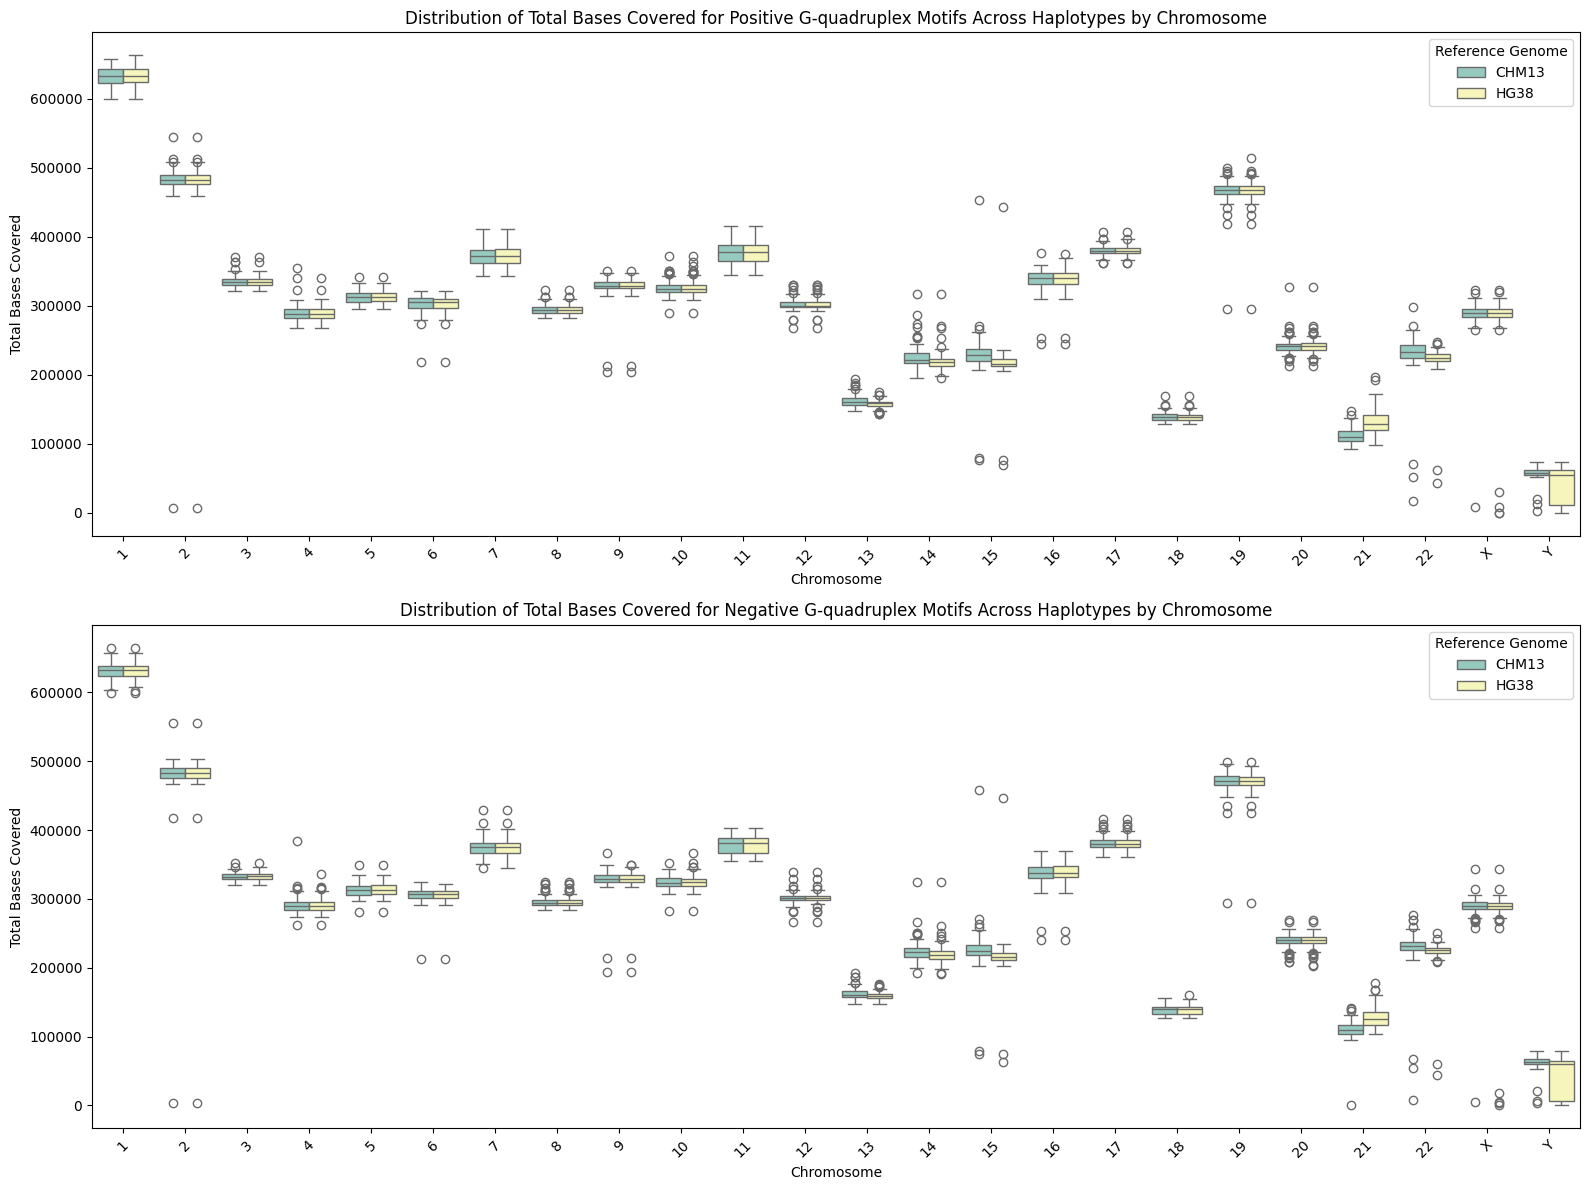

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load G-quadruplex data
def load_quad_data(reference):
    quad_path = f'/home/alextu/scratch/results/summary_stats/{reference}/verkko_batch123_{reference}_collapsed_quadron_summary_metrics_combined_chr.csv'
    quad_df = pd.read_csv(quad_path)
    quad_df['Label'] = reference.upper()  # Simplify label to just reference genome
    quad_df['Chromosome'] = quad_df['Chromosome'].str.extract(r'(chr[\dXY]+)')[0]  # Extract chromosome info
    return quad_df

# Load the G-quadruplex data for both HG38 and CHM13
hg38_quad_data = load_quad_data('hg38')
chm13_quad_data = load_quad_data('chm13')

# Combine data for plotting
combined_quad_data = pd.concat([hg38_quad_data, chm13_quad_data])

# Function to sort chromosomes
def sort_chromosomes(df):
    df['Chromosome'] = df['Chromosome'].str.extract(r'(\d+|X|Y)', expand=False)
    df['Chromosome'] = pd.Categorical(df['Chromosome'], categories=[str(i) for i in range(1, 23)] + ['X', 'Y'], ordered=True)
    return df.sort_values('Chromosome')

# Sort chromosomes for the combined data
combined_quad_data = sort_chromosomes(combined_quad_data)

# Separate data by Motif Type
positive_data = combined_quad_data[combined_quad_data['Motif Type'] == 'Positive_G_Quad']
negative_data = combined_quad_data[combined_quad_data['Motif Type'] == 'Negative_G_Quad']

# Plotting distributions
plt.figure(figsize=(16, 12))  # Adjust the figure size to provide more room
plt.subplot(2, 1, 1)
sns.boxplot(data=positive_data, x='Chromosome', y='Total Bases Covered', hue='Label', hue_order=['CHM13', 'HG38'], palette='Set3')
plt.title('Distribution of Total Bases Covered for Positive G-quadruplex Motifs Across Haplotypes by Chromosome')
plt.ylabel('Total Bases Covered')
plt.xlabel('Chromosome')
plt.xticks(rotation=45)
plt.legend(title='Reference Genome')  # Modify legend to show reference genomes

plt.subplot(2, 1, 2)
sns.boxplot(data=negative_data, x='Chromosome', y='Total Bases Covered', hue='Label', hue_order=['CHM13', 'HG38'], palette='Set3')
plt.title('Distribution of Total Bases Covered for Negative G-quadruplex Motifs Across Haplotypes by Chromosome')
plt.ylabel('Total Bases Covered')
plt.xlabel('Chromosome')
plt.xticks(rotation=45)
plt.legend(title='Reference Genome')  # Modify legend to show reference genomes

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


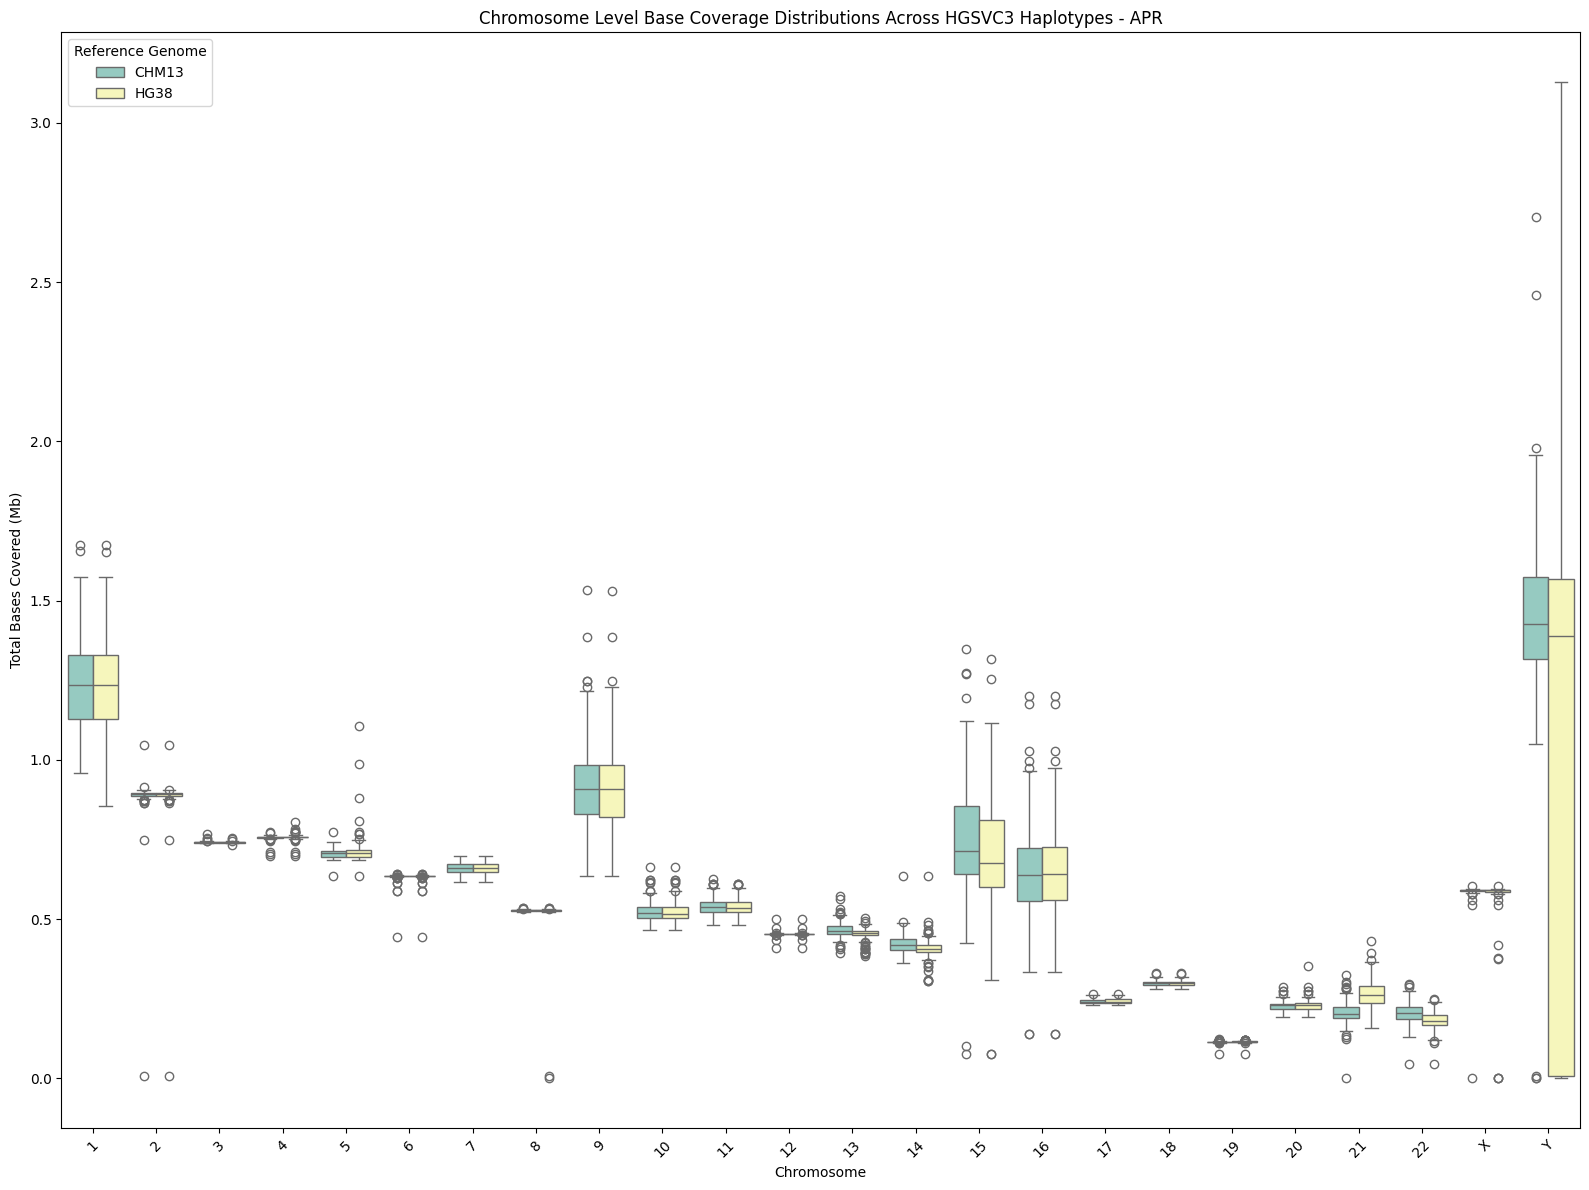

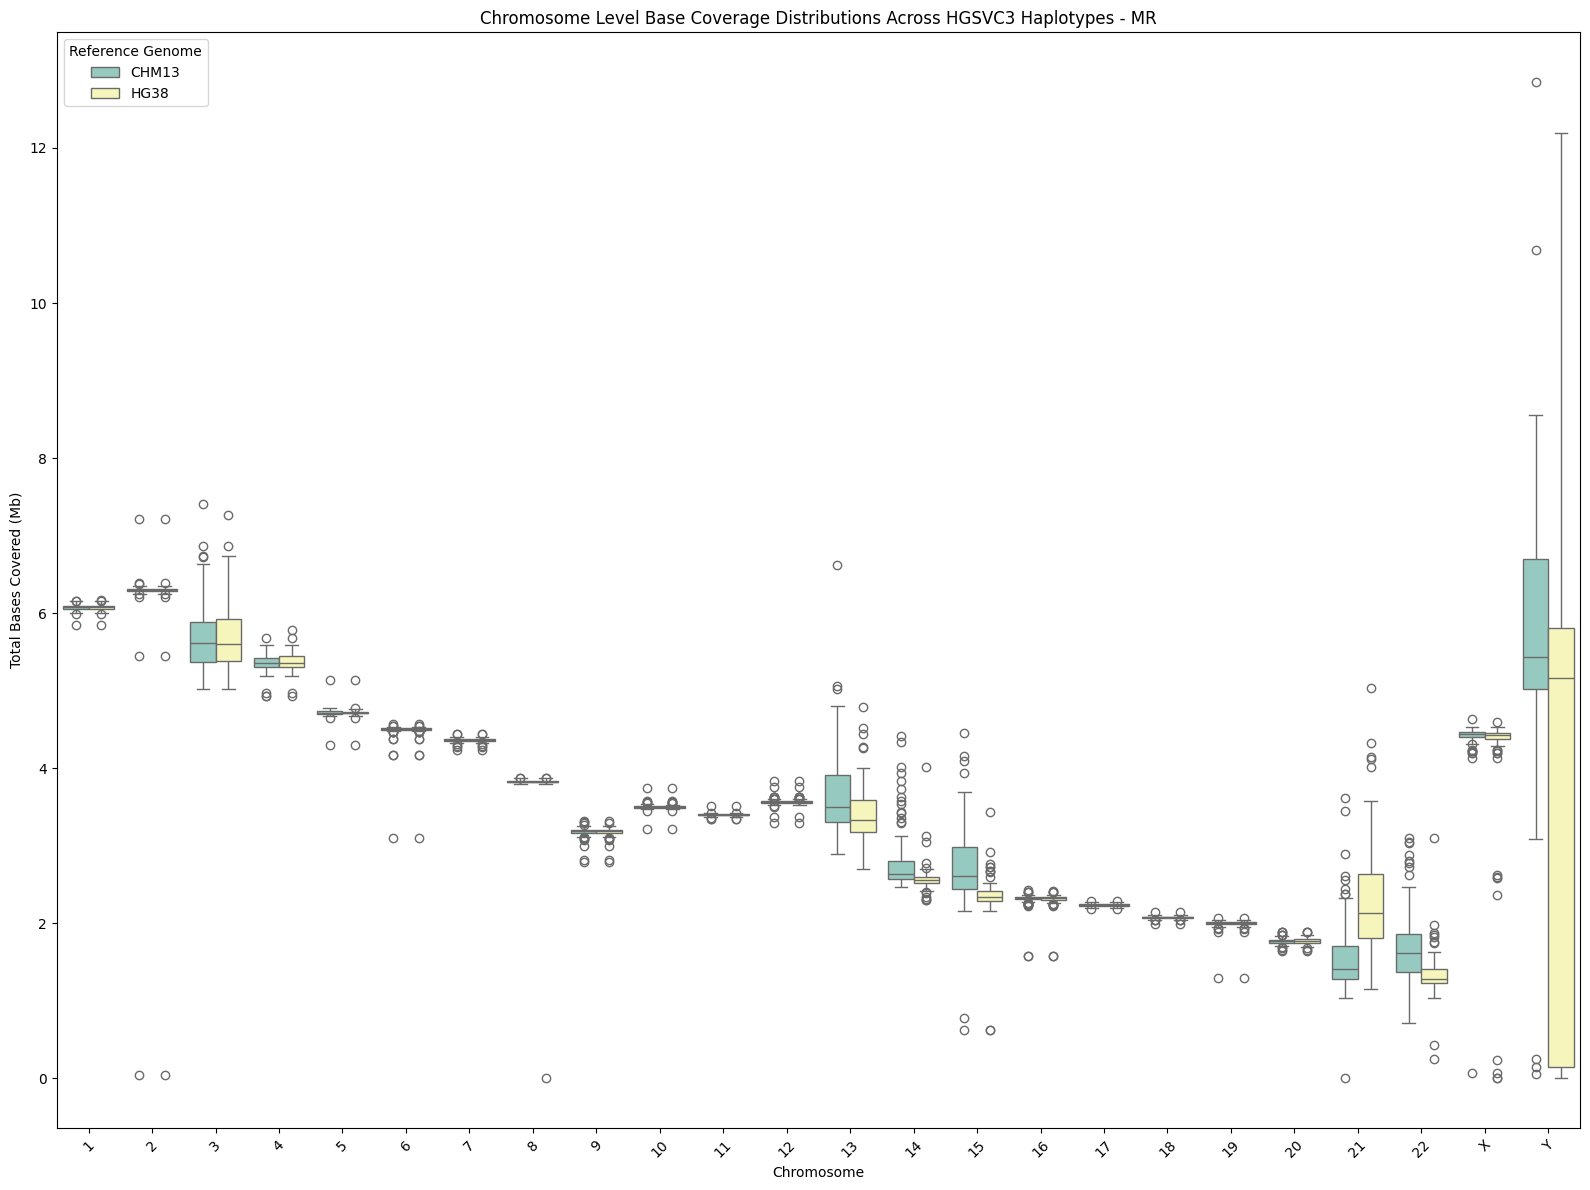

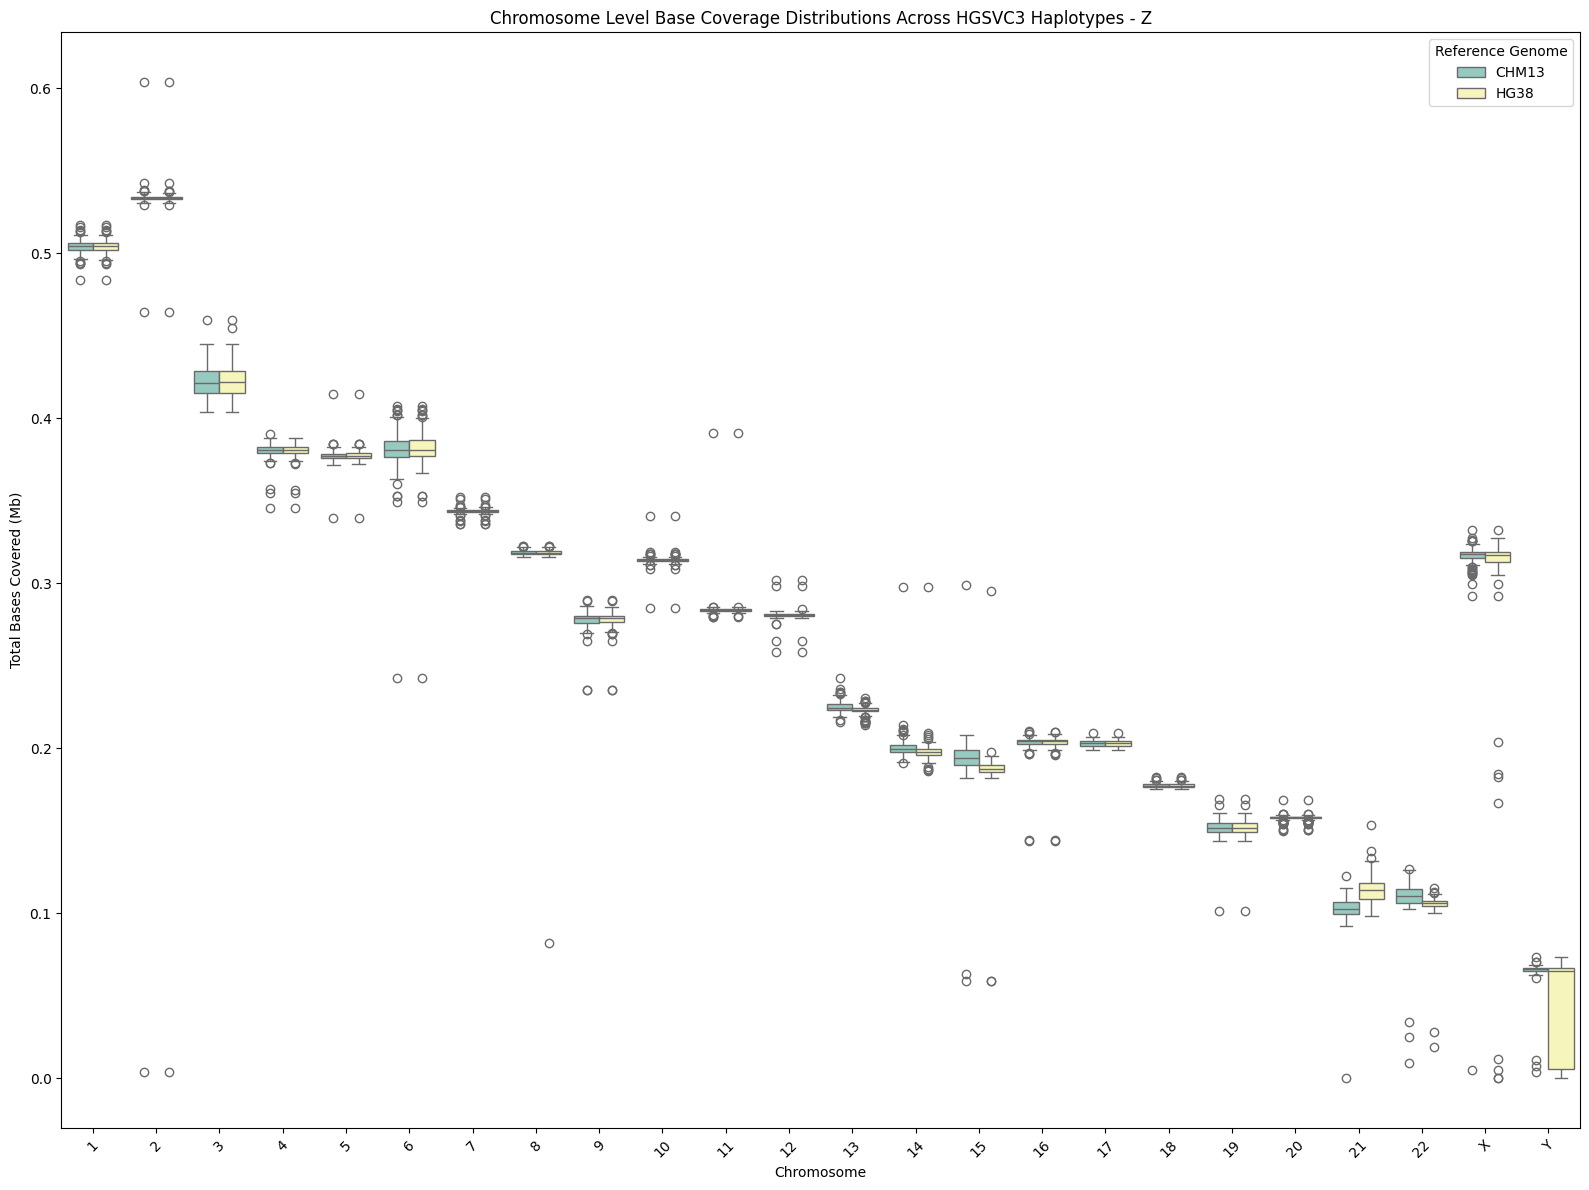

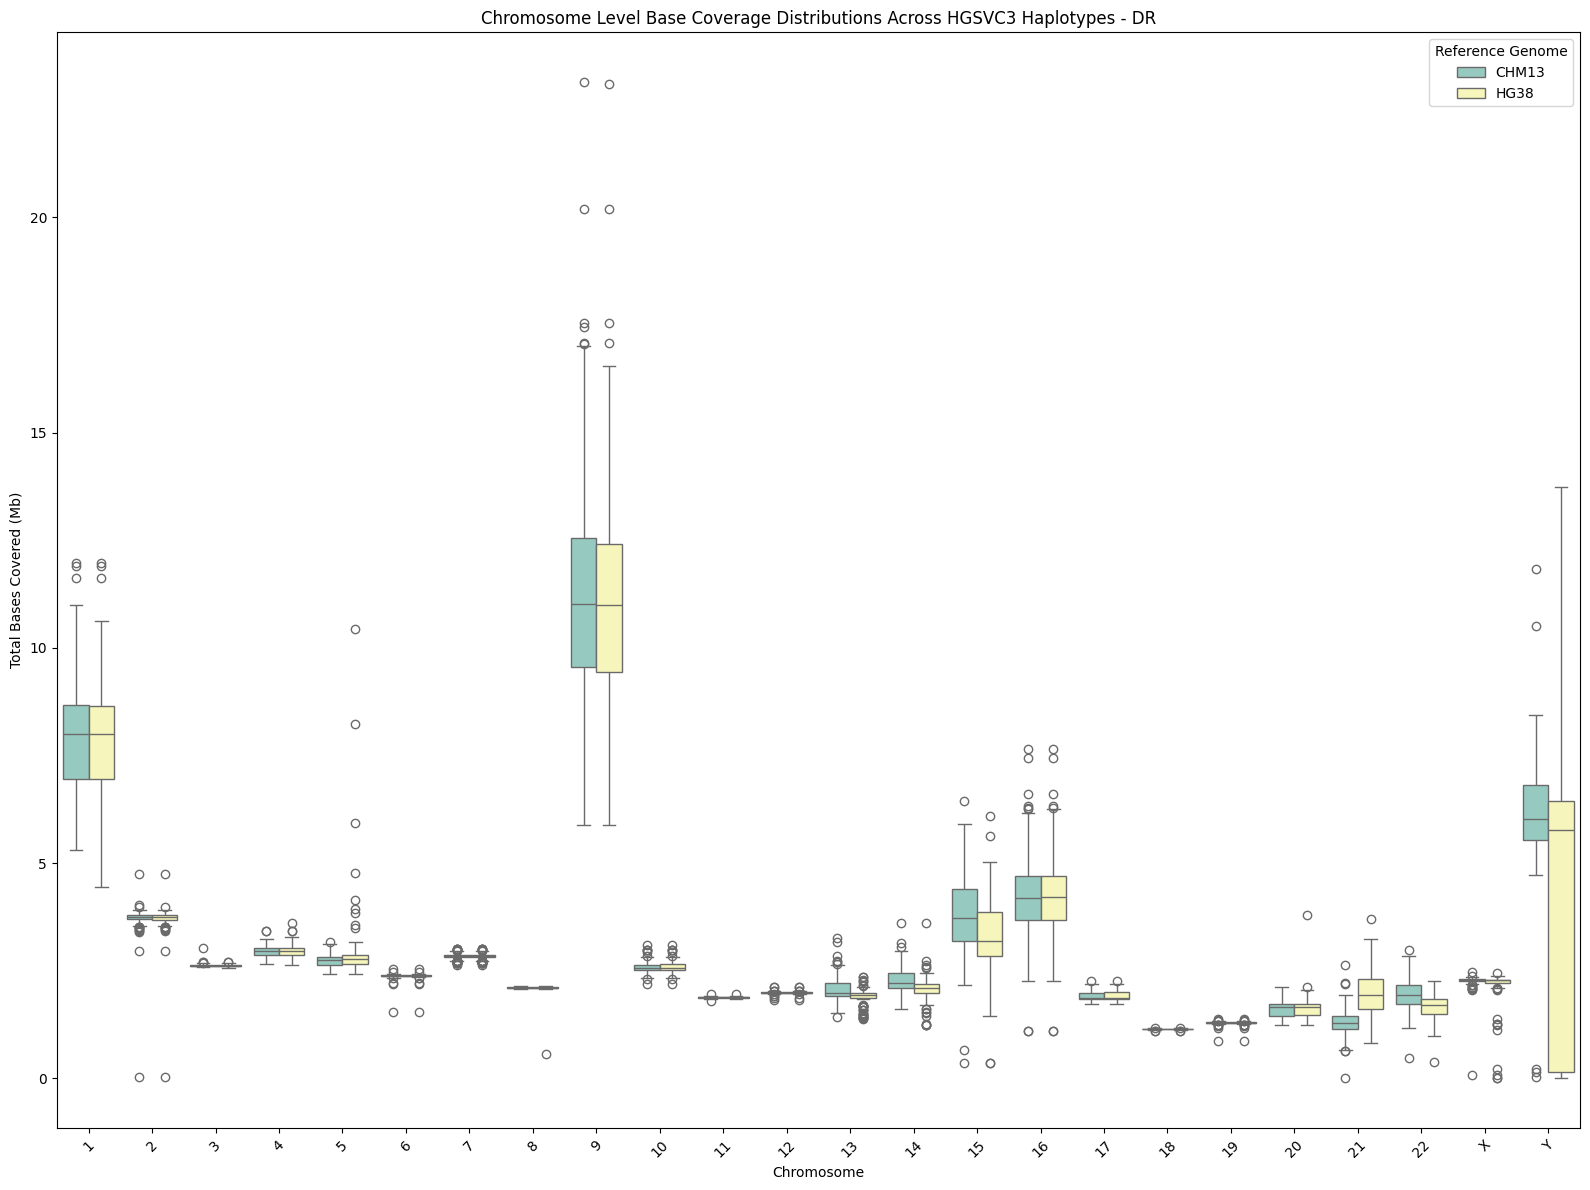

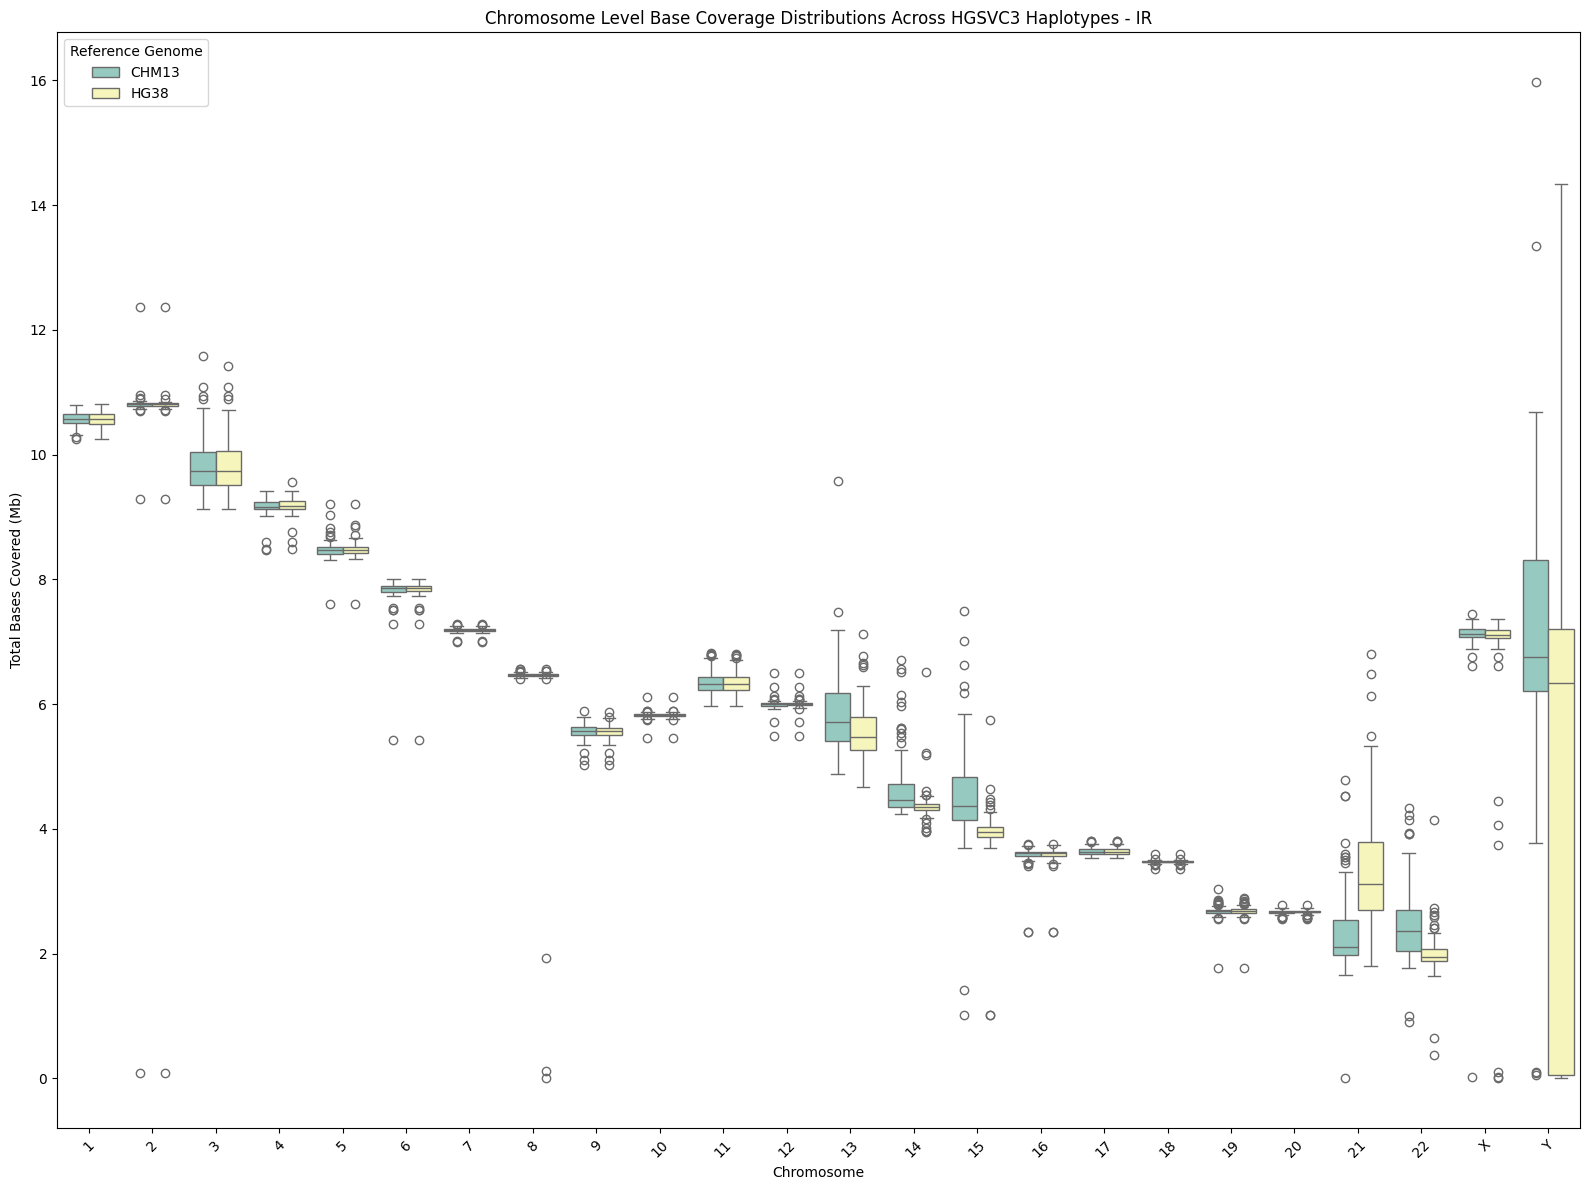

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Function to load data in batches
def load_data(reference, batch):
    path = f'/home/alextu/scratch/results/summary_stats/{reference}/verkko_batch{batch}_{reference}_collapsed_summary_metrics_chr.csv'
    if os.path.exists(path):
        df = pd.read_csv(path)
        df['Label'] = reference.upper()  # Simplify label to just reference genome
        df['Chromosome'] = df['Sample_Haplotype_Chromosome'].str.extract(r'(chr[\dXY]+)')[0]  # Extract chromosome info
        return df
    else:
        print(f"File {path} does not exist.")
        return pd.DataFrame()

# Function to prepare data for plotting
def prepare_data(df, label):
    df[['Sample', 'Haplotype']] = df['Sample_Haplotype_Chromosome'].str.split('|', expand=True)[0].str.split('_hap', expand=True)
    df['Chromosome'] = df['Sample_Haplotype_Chromosome'].str.split('|').str[-1]
    df['Label'] = label
    grouped_df = df.groupby(['Sample', 'Haplotype', 'Chromosome', 'Motif Type', 'Label']).agg({'Total Bases Covered': 'sum'}).reset_index()
    grouped_df['Total Bases Covered'] /= 1e6  # Convert to megabases
    return grouped_df

# Function to sort chromosomes
def sort_chromosomes(df):
    df['Chromosome'] = df['Chromosome'].str.extract(r'(\d+|X|Y)', expand=False)
    df['Chromosome'] = pd.Categorical(df['Chromosome'], categories=[str(i) for i in range(1, 23)] + ['X', 'Y'], ordered=True)
    return df.sort_values('Chromosome')

# Plotting function for each motif type
def plot_boxplots_for_motifs(df, title_prefix):
    motif_types = df['Motif Type'].unique()
    for motif in motif_types:
        motif_df = df[df['Motif Type'] == motif]
        plt.figure(figsize=(16, 12))  # Adjust the figure size to provide more room
        sns.boxplot(data=motif_df, x='Chromosome', y='Total Bases Covered', hue='Label', hue_order=['CHM13', 'HG38'], palette='Set3')
        plt.title(f'{title_prefix} - {motif}')
        plt.ylabel('Total Bases Covered (Mb)')
        plt.xlabel('Chromosome')
        plt.xticks(rotation=45)
        plt.legend(title='Reference Genome')  # Modify legend to show reference genomes
        plt.tight_layout()  # Adjust layout to avoid overlap
        plt.show()

# Load and process data in batches
batches = [1, 2, 3]  # List of batches
chm13_combined_df = pd.DataFrame()
hg38_combined_df = pd.DataFrame()

for batch in batches:
    chm13_df = load_data('chm13', batch)
    hg38_df = load_data('hg38', batch)
    
    chm13_combined_df = pd.concat([chm13_combined_df, chm13_df])
    hg38_combined_df = pd.concat([hg38_combined_df, hg38_df])

# Prepare combined data for CHM13 and HG38
if not chm13_combined_df.empty and not hg38_combined_df.empty:
    chm13_prepared = prepare_data(chm13_combined_df, 'CHM13')
    hg38_prepared = prepare_data(hg38_combined_df, 'HG38')
    
    # Combine data for plotting
    combined_data = pd.concat([chm13_prepared, hg38_prepared])
    
    # Sort chromosomes for the combined data
    combined_data = sort_chromosomes(combined_data)
    
    # Plot boxplots for each motif type
    plot_boxplots_for_motifs(combined_data, 'Chromosome Level Base Coverage Distributions Across HGSVC3 Haplotypes')


# Plotting AFR vs NON-AFR for Whole Genome

APR - Total Bases Covered (Mb) p-value: 1.8070e-02


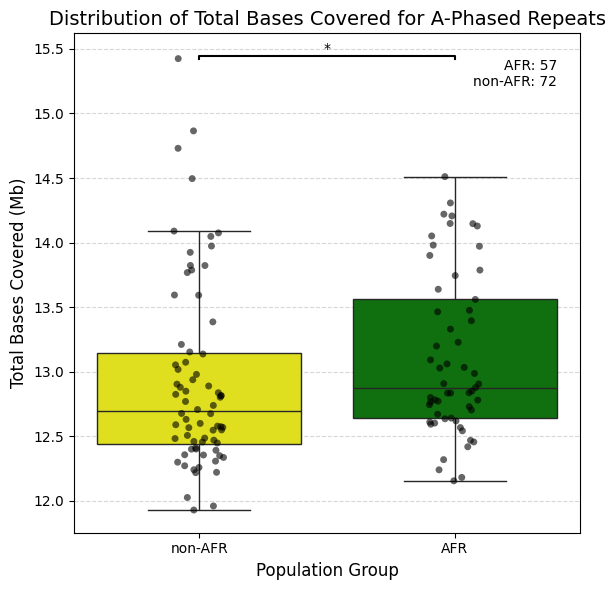

MR - Total Bases Covered (Mb) p-value: 1.4401e-04


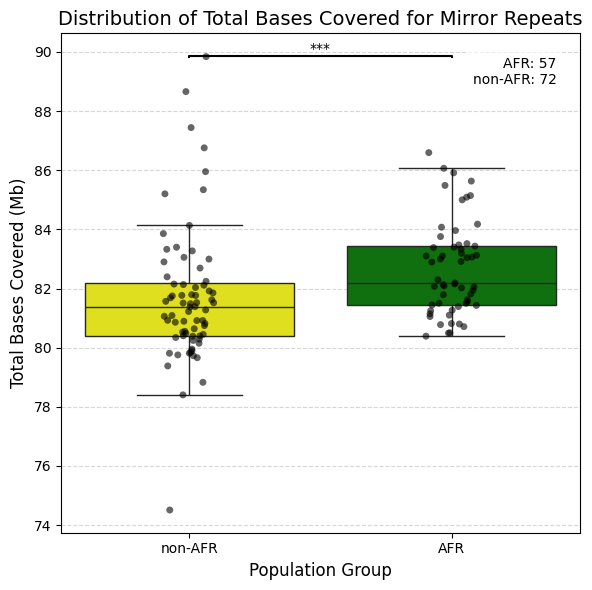

Negative_G_Quad - Total Bases Covered (Mb) p-value: 1.9788e-01


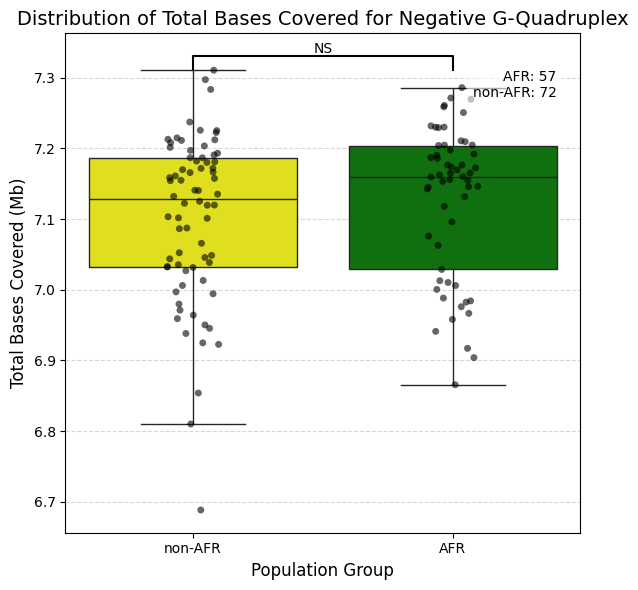

Positive_G_Quad - Total Bases Covered (Mb) p-value: 2.2380e-01


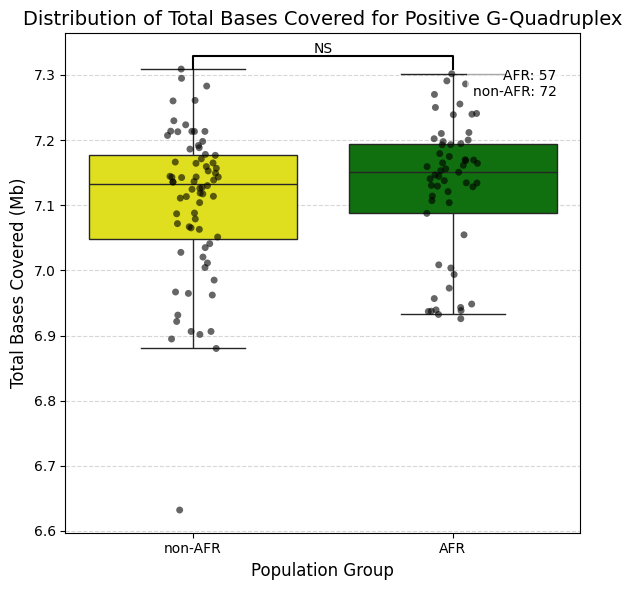

Z - Total Bases Covered (Mb) p-value: 5.3872e-02


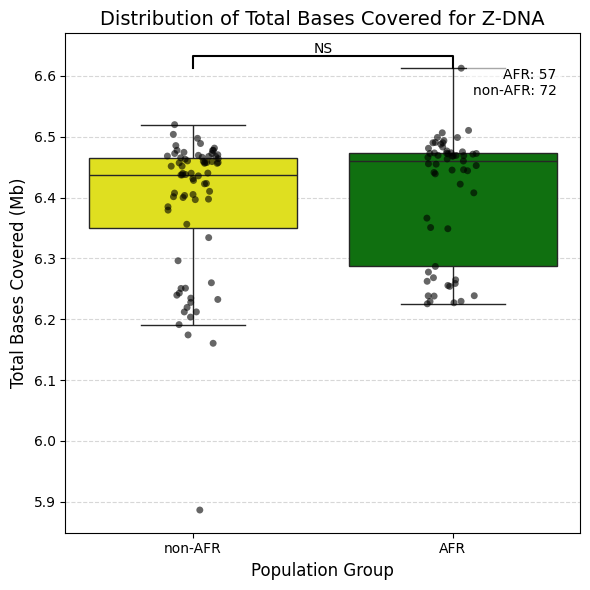

IR - Total Bases Covered (Mb) p-value: 5.4936e-05


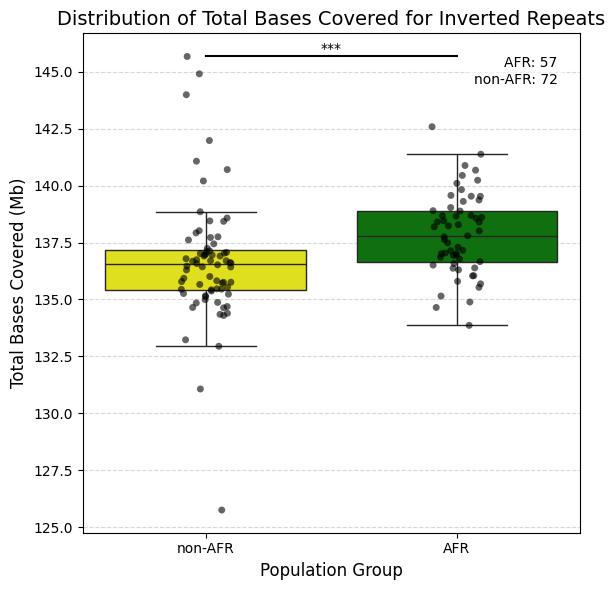

DR - Total Bases Covered (Mb) p-value: 1.0399e-03


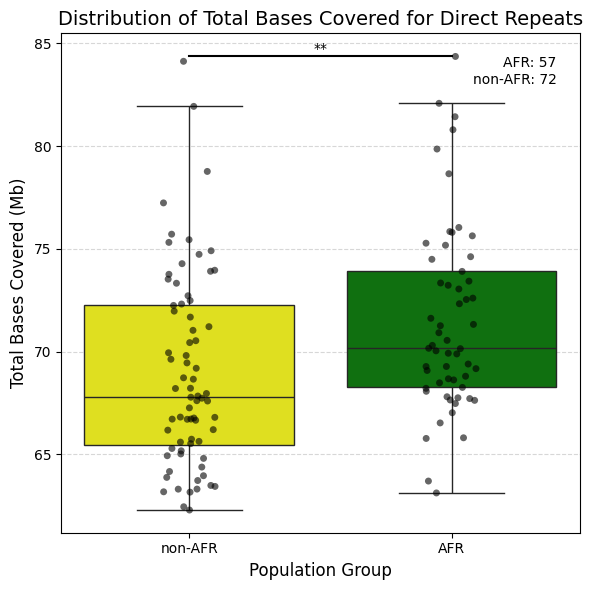

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Load your feature counts dataframes
batch1 = pd.read_csv('/home/alextu/scratch/results/summary_stats/chm13/verkko_batch1_chm13_collapsed_summary_metrics.csv')
batch2 = pd.read_csv('/home/alextu/scratch/results/summary_stats/chm13/verkko_batch2_chm13_collapsed_summary_metrics.csv')
batch3 = pd.read_csv('/home/alextu/scratch/results/summary_stats/chm13/verkko_batch3_chm13_collapsed_summary_metrics.csv')
batch4 = pd.read_csv('/home/alextu/scratch/results/summary_stats/chm13/verkko_batch123_chm13_collapsed_quadron_summary_metrics_combined.csv')

# Combine the dataframes
df = pd.concat([batch1, batch2, batch3, batch4], ignore_index=True)

# Extract sample identifier (e.g., HG#### or NA####) and haplotype from 'Sample_Haplotype' column
df[['Sample', 'Haplotype']] = df['Sample_Haplotype'].str.split('_', expand=True)

# Remove the specified sample_haplotype
df = df[df['Sample_Haplotype'] != 'NA20355_hap1']

# Sort by 'Sample_Haplotype'
sorted_df = df.sort_values(by='Sample_Haplotype')

# Assuming the metadata file is already read into metadata_df
metadata_df = pd.read_csv('/home/alextu/scratch/igsr_sample_metadata/igsr_samples.tsv', delimiter='\t')

# Merge metadata with the sorted DataFrame on 'Sample' column
merged_df = pd.merge(sorted_df, metadata_df[['Sample name', 'Sex', 'Superpopulation name', 'Superpopulation code']], left_on='Sample', right_on='Sample name', how='left')

# Group non-AFR populations together
merged_df['Population Group'] = merged_df['Superpopulation code'].apply(lambda x: 'AFR' if x == 'AFR' else 'non-AFR')

# Convert 'Total Bases Covered' to Megabases
merged_df['Total Bases Covered (Mb)'] = merged_df['Total Bases Covered'] / 1_000_000

# Define a color palette
palette = {'AFR': 'green', 'non-AFR': 'yellow'}

# Map short motif names to full names
motif_name_map = {
    'DR': 'Direct Repeats',
    'MR': 'Mirror Repeats',
    'IR': 'Inverted Repeats',
    'APR': 'A-Phased Repeats',
    'Z': 'Z-DNA',
    'Positive_G_Quad': 'Positive G-Quadruplex',
    'Negative_G_Quad': 'Negative G-Quadruplex'
}

# Function to add significance annotation
def add_significance_annotation(ax, p_value, x1, x2, y, h, col):
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    if p_value < 0.001:
        significance_text = '***'
    elif p_value < 0.01:
        significance_text = '**'
    elif p_value < 0.05:
        significance_text = '*'
    else:
        significance_text = 'NS'
    ax.text((x1 + x2) * .5, y + h, significance_text, ha='center', va='bottom', color=col)

# Plotting using seaborn
motif_types = merged_df['Motif Type'].unique()

for motif in motif_types:
    motif_df = merged_df[merged_df['Motif Type'] == motif]
    
    plt.figure(figsize=(6, 6))  # Adjust the figure size as needed

    # Create a boxplot using seaborn
    ax1 = sns.boxplot(data=motif_df, x='Population Group', y='Total Bases Covered (Mb)', hue='Population Group', palette=palette, dodge=False, showfliers=False)
    # Add jittered stripplot
    sns.stripplot(data=motif_df, x='Population Group', y='Total Bases Covered (Mb)', hue='Population Group', 
                  palette=['black']*2, dodge=False, jitter=True, size=5, marker='o', alpha=0.6, ax=ax1)

    # Customize plot
    plt.xlabel('Population Group', fontsize=12)
    plt.ylabel('Total Bases Covered (Mb)', fontsize=12)
    plt.title(f'Distribution of Total Bases Covered for {motif_name_map.get(motif, motif)}', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.legend([],[], frameon=False)  # Remove legend from the subplot
    
    # Perform Mann-Whitney U test
    afr_data = motif_df[motif_df['Population Group'] == 'AFR']['Total Bases Covered (Mb)']
    non_afr_data = motif_df[motif_df['Population Group'] == 'non-AFR']['Total Bases Covered (Mb)']
    _, p_value_total_bases = mannwhitneyu(afr_data, non_afr_data)
    
    # Print p-value
    print(f'{motif} - Total Bases Covered (Mb) p-value: {p_value_total_bases:.4e}')
    
    # Add significance annotation
    add_significance_annotation(ax1, p_value_total_bases, 0, 1, motif_df['Total Bases Covered (Mb)'].max(), 0.02, 'black')

    # Calculate unique sample_haplotype counts for AFR and non-AFR
    afr_sample_haplotypes = motif_df[motif_df['Population Group'] == 'AFR']['Sample_Haplotype'].nunique()
    non_afr_sample_haplotypes = motif_df[motif_df['Population Group'] == 'non-AFR']['Sample_Haplotype'].nunique()
    
    # Add annotations for sample_haplotype counts
    ax1.text(1.4, motif_df['Total Bases Covered (Mb)'].max(), f"AFR: {afr_sample_haplotypes}\nnon-AFR: {non_afr_sample_haplotypes}", 
             ha='right', va='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()
